# KNN

KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm.

Here, we will show you how to implement the KNN algorithm for classification, and show how different values of K affect the results.

# How does it work?

K is the number of nearest neighbors to use. For classification, a majority vote is used to determine which class a new observation should fall into. Larger values of K are often more robust to outliers and produce more stable decision boundaries than very small values (K=3 would be better than K=1, which might produce undesirable results.
# Example

Start by visualizing some data points:

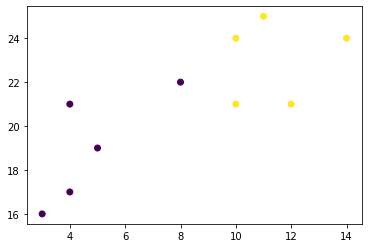

In [18]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show() 

Now we fit the KNN algorithm with K=1:

In [19]:
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes) 

KNeighborsClassifier(n_neighbors=1)

And use it to classify a new data point:
# Example

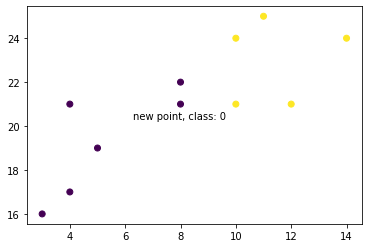

In [20]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Now we do the same thing, but with a higher K value which changes the prediction:
# Example

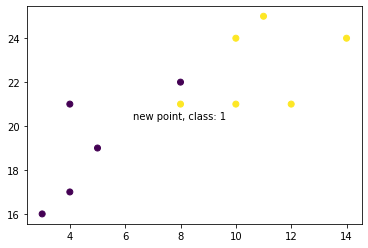

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show() 

# Example Explained

Import the modules you need.

In [22]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 

Create arrays that resemble variables in a dataset. We have two input features (x and y) and then a target class (class). The input features that are pre-labeled with our target class will be used to predict the class of new data. Note that while we only use two input features here, this method will work with any number of variables:

In [23]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1] 
x.sort()
x

[3, 4, 4, 5, 8, 10, 10, 11, 12, 14]

Turn the input features into a set of points:

In [24]:
data = list(zip(x, y))
print(data)

[(3, 21), (4, 19), (4, 24), (5, 17), (8, 16), (10, 25), (10, 24), (11, 22), (12, 21), (14, 21)]


Using the input features and target class, we fit a KNN model on the model using 1 nearest neighbor:

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes) 

KNeighborsClassifier(n_neighbors=1)

Then, we can use the same KNN object to predict the class of new, unforeseen data points. First we create new x and y features, and then call knn.predict() on the new data point to get a class of 0 or 1:

In [26]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction) 

[0]


When we plot all the data along with the new point and class, we can see it's been labeled blue with the 1 class. The text annotation is just to highlight the location of the new point:

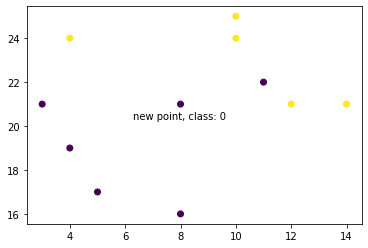

In [27]:
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show() 

However, when we change the number of neighbors to 5, the number of points used to classify our new point changes. As a result, so does the classification of the new point:

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction) 

[1]


When we plot the class of the new point along with the older points, we note that the color has changed based on the associated class label:

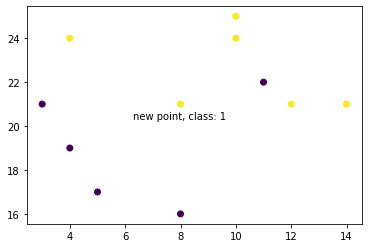

In [29]:
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show() 